# GP Regression Demo
This demonstration covers the basics of a supervised learning problem with gptorch:
* Defining a model
* Training the model
* Predicting with the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [2]:
from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE
from gptorch import kernels
from gptorch.util import TensorType
from gptorch import mean_functions

In [3]:
from gptorch import kernels

## Ground truth and training data
We'll try to model a simple one-dimensional sinusoid.

In [4]:
def f(x):
    return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x

In [5]:
n = 100
x = np.linspace(0, 1, n).reshape((-1, 1))
y = f(x) + 0.1 * np.random.randn(n, 1)

## Model definition
Here, we define the GP model.

We can use a simple vanilla GP or a sparse GP.

In [6]:
# Try different kernels...
kern = kernels.Rbf(1)
# kern = kernels.Matern32(1)
# kern = kernels.Sum(kernels.Linear(1), kernels.Rbf(1))

In [7]:
# Try different models:
# model = GPR(y, x, kern)
model = VFE(y, x, kern)
model.likelihood.variance.data = TensorType([1.0e-6])

## Train the model

In [8]:
# Train
model.optimize(method="L-BFGS-B", max_iter=100)
print("Trained model:")
print(model)

Scipy.optimize.minimize...
loss: [127.72682963]
loss: [98.2775115]
loss: [86.0911087]
loss: [1082.40937159]
loss: [25.60579679]
loss: [8.11009623]
loss: [0.98714958]
loss: [-22.14326215]
loss: [118.53298101]
loss: [-29.05887398]
loss: [-28.19982696]
loss: [60138157.94438419]
loss: [7725.12626572]
loss: [-46.31520776]
loss: [161.57794007]
loss: [-44.43528757]
loss: [-47.4630549]
loss: [-45.77572232]
loss: [-52.9730796]
loss: [-58.50155605]
loss: [-64.10832357]
loss: [-15.25226677]
loss: [-65.33294307]
loss: [-67.03020818]
loss: [-68.04930363]
loss: [-68.75145556]
loss: [-69.02683764]
loss: [-69.28658891]
loss: [-69.5638607]
loss: [-69.73860165]
loss: [-69.7599324]
loss: [-69.76297259]
loss: [-69.7737053]
loss: [-69.78454878]
loss: [-69.80294157]
loss: [-69.82552046]
loss: [-69.85297682]
loss: [-69.80385004]
loss: [-69.86478393]
loss: [-69.87832318]
loss: [-69.90806406]
loss: [-69.96010418]
loss: [-70.02626807]
loss: [-70.06851649]
loss: [-70.09897129]
loss: [-70.12150916]
loss: [-70.149

## Predict

In [9]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-1, 2, n_test).reshape((-1, 1))
mu, s = model.predict_y(x_test)
mu, s = mu.data.numpy().flatten(), s.data.numpy().flatten()
y_samp = model.predict_y_samples(x_test, n_samples).data.numpy()
unc = 2.0 * np.sqrt(s)

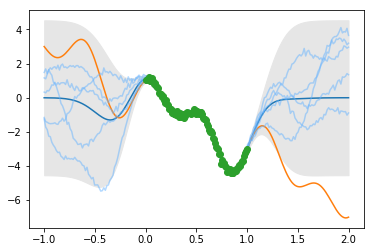

In [10]:
# Show prediction
x_test = x_test.flatten()
plt.figure()
plt.fill_between(x_test, mu - unc, mu + unc, color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
plt.plot(x, y, 'o')
plt.show()